In [1]:
%pylab inline
import numpy as np
from conway99 import *

Populating the interactive namespace from numpy and matplotlib


# A representative seed graph
We start from an arbitrary vertex and its neighbours. These can necessarily be arranged as 7 blades of a fan; we fix a numbering with vertex 0 the centre, 1-14 its neighbours, and blade edges 1-2, 3-4, 5-6, 7-8, 9-10, 11-12, 13-14

In [2]:
seed15 = np.empty((15,15), dtype='int')
for i in range(15):
    for j in range(15):
        seed15[i,j] = 0

# 1-14 all nhbrs of 0
for i in range(1,15):
    seed15[0,i] = 1
    seed15[i,0] =1
    
# By fixing an ordering, a single representative suffices
for i in [1,3,5,7,9,11,13]:
    seed15[i,i+1] = 1
    seed15[i+1,i] = 1

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


C:\Users\Graeme\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


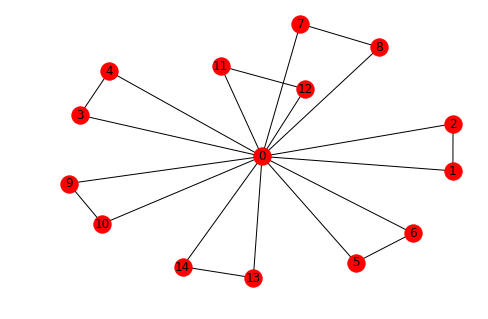

In [3]:
# review
print(seed15)
plot_given_edges(seed15)

In [4]:
# Verify some details
assert len(seed15)*len(seed15) == num_known_zeros(seed15) + num_known_ones(seed15) + num_unknowns(seed15)
assert not(has_unknown_values(seed15))
assert lambda_compatible(seed15)
assert mu_compatible(seed15)
assert meets_adjacency_requirements(seed15, debug=True)
assert graph_is_valid(seed15)

# Adding vertex 15
(NB, as we started numbering at 0, this is our 16th vertex)

wlog, we let this be a neighbour of vertex 1

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2]
 [0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0]]


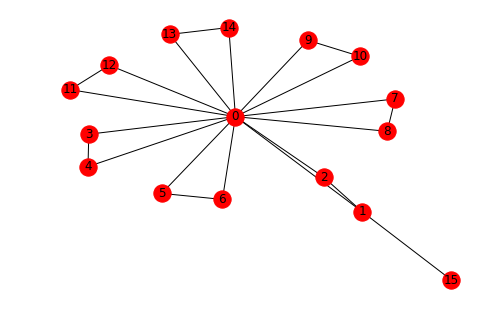

In [5]:
# Generate template with an additional vertex, and review
seed16 = get_supermatrix_template(seed15, forced_edges=[(1,15)])
print(seed16)
plot_given_edges(seed16)

In [6]:
# Fill in the template
%time super16 = templates_to_valid_graphs([seed16], verbose=2)

Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Adding branch 1 candidate
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Branch 0 yielded compatible graph
Branch 1 inv

In [7]:
# Reduce to eliminate equivalent graphs
rep16 = reduce_mod_equivalence(super16, verbose=True)

	1 reps for 1 candidates


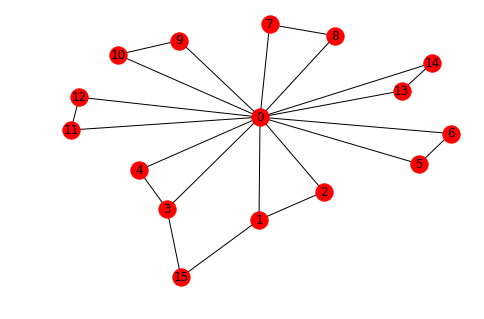

In [8]:
# Turns out, there's only really one way to extend this! Let's take a look
plot_given_edges(rep16[0])

This was expected:

By mu=2 condition, as 15 is not a nhbr of 0, they have 2 mutual nhbrs
 * As the nhbrs of 0 are 1-14, 15 nhbrs two of these.
 * We assumed 1-15 already; this prevents 2-15 (else 1,2 are nhbrs with two mutual nhbrs - 0, 15 - violating lambda=1) 
 * So 15 nhbrs precisely 1 of vertices 3-14, and these 12 choices are equivalent
 * So to fix notation we can force this nhbr to be vertex 14
 
Moreover, we could have applied this at the template stage to reduce the search space.

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 1 2 2 2 2 2 2 2 2 2 2 2 2 1 0]]


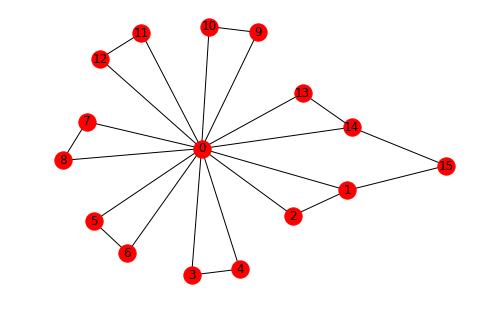

In [9]:
# alternative template 
seed16 = get_supermatrix_template(seed15, forced_edges=[(1,15), (15,14)])
print(seed16)
plot_given_edges(seed16)

In [10]:
# Fill in the template
%time super16 = templates_to_valid_graphs([seed16], verbose=2)

Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Branch 0 yielded compatible graph
Branch 1 invalid
Reduces to 1 valid graphs
Wall time: 15.9 ms


In [11]:
# For convenience, can wrap up the templating, search, and reduction steps for a list of seed graphs
%time rep16 = find_valid_supergraphs([seed15], forced_edges=[(1,15), (15,14)])

2020-05-01 11:41:31.597056: 1 seed templates generated
2020-05-01 11:41:31.610062: 1 valid graphs from templates
	1 reps for 1 candidates
2020-05-01 11:41:31.610062: Reduced to 1 representatives
Wall time: 13 ms


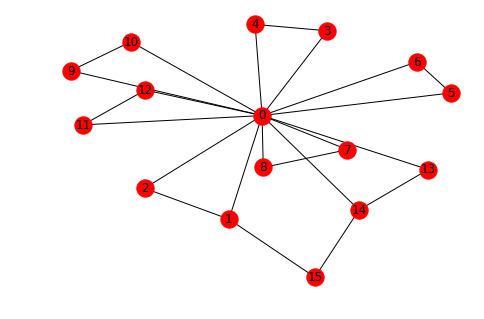

In [12]:
# confirm this is what we expected from the individual steps:
plot_given_edges(rep16[0])

# Saturating vertex 1

We know one of the blades centred at vertex 1; namely 1-0-2-1.

We also have part of another, containing vertex 15.

wlog, let vertex 16 be the other vertex of that blade (_so we force 1-16, and 15-16_)

In [13]:
%time rep17 = find_valid_supergraphs(rep16, forced_edges=[(1,16),(15,16)])

2020-05-01 11:41:31.701777: 1 seed templates generated
2020-05-01 11:41:31.808531: 11 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 11 candidates
2020-05-01 11:41:31.809488: Reduced to 2 representatives
Wall time: 108 ms


Vertex 17 necessarily starts a new blade, so only forcing 1-17

In [14]:
%time rep18 = find_valid_supergraphs(rep17, forced_edges=[(1,17)])

2020-05-01 11:41:31.816469: 2 seed templates generated
2020-05-01 11:41:32.095721: 20 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 11 candidates
	3 reps for 12 candidates
2020-05-01 11:41:32.099712: Reduced to 3 representatives
Wall time: 284 ms


However, we can then force vertex 18 to be the other vertex of that blade

In [15]:
%time rep19 = find_valid_supergraphs(rep18, forced_edges=[(1,18),(17,18)])

2020-05-01 11:41:32.105697: 3 seed templates generated
2020-05-01 11:41:32.527599: 27 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 3 candidates
	4 reps for 18 candidates
	5 reps for 19 candidates
2020-05-01 11:41:32.531588: Reduced to 5 representatives
Wall time: 426 ms


Continue in this fashion until we have all nhbrs of vertex 1, with forced fan pattern 0-2, 15-16, 17-18, 19-20, 21-22, 23-24, 25-26

In [16]:
%time rep20 = find_valid_supergraphs(rep19, forced_edges=[(1,19)])

2020-05-01 11:41:32.537542: 5 seed templates generated
2020-05-01 11:41:33.452152: 40 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 9 candidates
	3 reps for 17 candidates
	4 reps for 20 candidates
	5 reps for 25 candidates
	6 reps for 26 candidates
	7 reps for 33 candidates
	8 reps for 34 candidates
2020-05-01 11:41:33.458110: Reduced to 8 representatives
Wall time: 922 ms


In [17]:
%time rep21 = find_valid_supergraphs(rep20, forced_edges=[(1,20), (19,20)])

2020-05-01 11:41:33.464063: 8 seed templates generated
2020-05-01 11:41:34.767616: 56 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 3 candidates
	4 reps for 14 candidates
	5 reps for 16 candidates
	6 reps for 17 candidates
	7 reps for 28 candidates
	8 reps for 33 candidates
	9 reps for 42 candidates
	10 reps for 50 candidates
2020-05-01 11:41:34.775590: Reduced to 10 representatives
Wall time: 1.31 s


In [18]:
%time rep22 = find_valid_supergraphs(rep21, forced_edges=[(1,21)])

2020-05-01 11:41:34.783568: 10 seed templates generated
2020-05-01 11:41:36.577773: 60 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 7 candidates
	3 reps for 9 candidates
	4 reps for 13 candidates
	5 reps for 19 candidates
	6 reps for 25 candidates
	7 reps for 28 candidates
	8 reps for 31 candidates
	9 reps for 32 candidates
	10 reps for 37 candidates
	11 reps for 43 candidates
	12 reps for 44 candidates
	13 reps for 46 candidates
	14 reps for 49 candidates
	15 reps for 50 candidates
	16 reps for 55 candidates
	17 reps for 56 candidates
2020-05-01 11:41:36.588740: Reduced to 17 representatives
Wall time: 1.81 s


In [19]:
%time rep23 = find_valid_supergraphs(rep22, forced_edges=[(1,22), (21,22)])

2020-05-01 11:41:36.595722: 17 seed templates generated
2020-05-01 11:41:39.472030: 85 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 3 candidates
	4 reps for 10 candidates
	5 reps for 12 candidates
	6 reps for 13 candidates
	7 reps for 20 candidates
	8 reps for 22 candidates
	9 reps for 27 candidates
	10 reps for 35 candidates
	11 reps for 42 candidates
	12 reps for 43 candidates
	13 reps for 50 candidates
	14 reps for 60 candidates
	15 reps for 70 candidates
	16 reps for 76 candidates
	17 reps for 81 candidates
2020-05-01 11:41:39.485995: Reduced to 17 representatives
Wall time: 2.89 s


In [20]:
%time rep24 = find_valid_supergraphs(rep23, forced_edges=[(1,23)])

2020-05-01 11:41:39.493972: 17 seed templates generated
2020-05-01 11:41:42.607643: 68 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 5 candidates
	3 reps for 9 candidates
	4 reps for 13 candidates
	5 reps for 15 candidates
	6 reps for 17 candidates
	7 reps for 21 candidates
	8 reps for 25 candidates
	9 reps for 26 candidates
	10 reps for 29 candidates
	11 reps for 31 candidates
	12 reps for 33 candidates
	13 reps for 34 candidates
	14 reps for 37 candidates
	15 reps for 41 candidates
	16 reps for 45 candidates
	17 reps for 46 candidates
	18 reps for 49 candidates
	19 reps for 50 candidates
	20 reps for 53 candidates
	21 reps for 57 candidates
	22 reps for 58 candidates
	23 reps for 61 candidates
	24 reps for 62 candidates
	25 reps for 65 candidates
	26 reps for 66 candidates
2020-05-01 11:41:42.621612: Reduced to 26 representatives
Wall time: 3.13 s


In [21]:
%time rep25 = find_valid_supergraphs(rep24, forced_edges=[(1,24), (23,24)])

2020-05-01 11:41:42.630583: 26 seed templates generated
2020-05-01 11:41:46.805415: 78 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 6 candidates
	4 reps for 8 candidates
	5 reps for 12 candidates
	6 reps for 14 candidates
	7 reps for 18 candidates
	8 reps for 23 candidates
	9 reps for 27 candidates
	10 reps for 29 candidates
	11 reps for 33 candidates
	12 reps for 39 candidates
	13 reps for 45 candidates
	14 reps for 53 candidates
	15 reps for 57 candidates
	16 reps for 60 candidates
	17 reps for 67 candidates
	18 reps for 70 candidates
	19 reps for 76 candidates
2020-05-01 11:41:46.820371: Reduced to 19 representatives
Wall time: 4.19 s


In [22]:
%time rep26 = find_valid_supergraphs(rep25, forced_edges=[(1,25)])

2020-05-01 11:41:46.828355: 19 seed templates generated
2020-05-01 11:41:49.854261: 38 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 3 candidates
	3 reps for 5 candidates
	4 reps for 7 candidates
	5 reps for 9 candidates
	6 reps for 11 candidates
	7 reps for 13 candidates
	8 reps for 15 candidates
	9 reps for 17 candidates
	10 reps for 19 candidates
	11 reps for 21 candidates
	12 reps for 23 candidates
	13 reps for 25 candidates
	14 reps for 27 candidates
	15 reps for 29 candidates
	16 reps for 31 candidates
	17 reps for 33 candidates
	18 reps for 35 candidates
	19 reps for 37 candidates
2020-05-01 11:41:49.863234: Reduced to 19 representatives
Wall time: 3.04 s


In [23]:
%time rep27 = find_valid_supergraphs(rep26, forced_edges=[(1,26),(25,26)])

2020-05-01 11:41:49.872179: 19 seed templates generated
2020-05-01 11:41:52.217944: 19 valid graphs from templates
	1 reps for 1 candidates
	2 reps for 2 candidates
	3 reps for 4 candidates
	4 reps for 6 candidates
	5 reps for 8 candidates
	6 reps for 10 candidates
	7 reps for 12 candidates
	8 reps for 14 candidates
	9 reps for 16 candidates
	10 reps for 18 candidates
	11 reps for 19 candidates
2020-05-01 11:41:52.222925: Reduced to 11 representatives
Wall time: 2.35 s


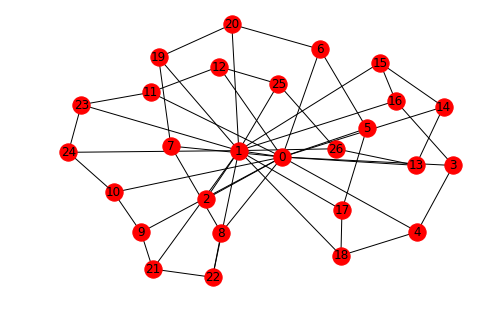

In [24]:
# Review an example

plot_given_edges(rep27[0])

# Saturating vertex 2 - forcing a particular fanblade pattern
(a smaller search space, but not necessarily one that ultimately yields a solution...)

In [25]:
%time rep28 = find_valid_supergraphs(rep27, forced_edges=[(2,27),(3,27)], verbose=False)

2020-05-01 11:41:52.335625: 11 seed templates generated
2020-05-01 11:41:57.156732: 131 valid graphs from templates
2020-05-01 11:41:57.181662: Reduced to 66 representatives
Wall time: 4.85 s


In [26]:
%time rep29 = find_valid_supergraphs(rep28, forced_edges=[(2,28),(4,28),(27,28)], verbose=False)

2020-05-01 11:41:57.199626: 66 seed templates generated
2020-05-01 11:42:23.602998: 671 valid graphs from templates
2020-05-01 11:42:23.729658: Reduced to 288 representatives
Wall time: 26.5 s


This will start to get a bit slow. Could known non-edges help?

Necessarily vertex 29 does not neighbour vertex 0. Thus they have precisely 2 mutual neighbours. Since we are forcing these to be 2 and 5, we already know that no other vertex from 1 through 14 is a neighbour of vertex 29.

We also know that vertices 27, 28 are neighbours of vetex 2, with each other as mutual neighbour. So they cannot neighbour any  other neighbour of vertex 2, namely vertex 29. 

In [31]:
non_nhbrs_29 = [k for k in range(15) if k not in [2,5]]
non_edge_29 = [(n,29) for n in non_nhbrs_29]
non_edge_29.extend([(27,29),(28,29)])
print(non_edge_29)

[(0, 29), (1, 29), (3, 29), (4, 29), (6, 29), (7, 29), (8, 29), (9, 29), (10, 29), (11, 29), (12, 29), (13, 29), (14, 29), (27, 29), (28, 29)]


In [32]:
%time rep30 = find_valid_supergraphs(rep29, forced_edges=[(2,29),(5,29)], forced_non_edges=non_edge_29, verbose=False)

2020-05-01 11:51:28.782890: 288 seed templates generated
2020-05-01 11:53:23.364424: 2851 valid graphs from templates
2020-05-01 11:53:23.919940: Reduced to 2263 representatives
Wall time: 1min 55s


similar logic for vertex 30; nb we _don't_ block, but rather require, that 29 and 30 be neighbours.

In [36]:
non_edge_30 = [(k,30) for k in range(15) if k not in [2,6]]
non_edge_30.extend([(27,30),(28,30)])

In [35]:
%time rep31 = find_valid_supergraphs(rep30, forced_edges=[(2,30),(6,30),(29,30)], forced_non_edges=non_edge_30, verbose=False)

2020-05-01 11:55:03.241299: 2263 seed templates generated
2020-05-01 12:07:37.716431: 17186 valid graphs from templates
2020-05-01 12:07:41.194127: Reduced to 10575 representatives
Wall time: 12min 38s


In [43]:
#%time rep32 = find_valid_supergraphs(rep31, forced_edges=[(2,31),(7,31)], verbose=False)

2020-04-30 17:11:59.883647: 10575 seed templates generated
2020-04-30 19:07:14.753843: 83044 valid graphs from templates
2020-04-30 22:16:30.890289: Reduced to 75617 representatives
Wall time: 5h 4min 34s


In [44]:
#import pickle

In [45]:
#pickle.dump( rep32, open( "rep32-subset.p", "wb" ) )

In [50]:
#%time rep33 = find_valid_supergraphs(rep32, forced_edges=[(2,32),(8,32),(31,32)], verbose=False)